# Session 7 - Neural Networks for image data

In this notebook, we're going to see how we can train simple neural networks using ```TensorFlow```, a machine learning and deep learning framework developed by Google Research. You can find the documentation [here](https://www.tensorflow.org/).

We're still working on greyscale images at this point - next week, we'll start thinking about working with full colour images.

In [1]:
# generic tools
import numpy as np

# tools from sklearn
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# tools from tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K
from tensorflow.keras.utils import plot_model

# matplotlib
import matplotlib.pyplot as plt

2023-03-17 12:40:53.196788: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Download data, train-test split

We're going to download the ```MNIST``` dataset again, so that we compare this pipeline to the baseline benchmarks we created previously.

In [2]:
# download data
data, labels = fetch_openml('mnist_784', version=1, return_X_y=True)

# normalise data
data = data.astype("float")/255.0

# split data
(X_train, X_test, y_train, y_test) = train_test_split(data,
                                                    labels, 
                                                    test_size=0.2)

/home/coder/.local/lib/python3.9/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
# convert labels to one-hot encoding
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

## Define neural network architecture using ```tf.keras```

We're now going to create our neural network using ```TensorFlow```. In particular, we're going to using the ```keras``` wrapper which makes the syntax a bit simpler to work with.

The code below makes a fully-connected, feed-forward neural network with the following features:

- Input layer of 784
- One hidden layer of 256
- Second hidden layer of 128
- An output layer of 10 nodes

In [4]:
# define architecture 784x256x128x10
model = Sequential()                    # sequential = feed forward
model.add(Dense(256, 
                input_shape=(784,), 
                activation="relu"))     # alternative: "sigmoid"
model.add(Dense(128, 
                activation="relu"))
model.add(Dense(10,                     # The 10 possible classes (the output layer)
                activation="softmax"))

2023-03-17 12:51:35.812915: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Show summary of model architecture

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


## Visualise model layers

If you want to do view this, there are some extra things that you can install - ```TensorFlow``` gives you instructions to do that.

**NB:** This might not work on Windows (but I'm not sure).

In [6]:
plot_model(model, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## Compile model loss function, optimizer, and preferred metrics

One of the big differences with ```TensorFlow``` vs ```scikit-learn``` is that we have much more control over how the optimization algorithm works.

We initalize the optimizer and then we have to *compile* the model.

In [7]:
# train model using SGD
sgd = SGD(0.01)
# compile into a graph structure
model.compile(loss="categorical_crossentropy",      # loss function
              optimizer=sgd, 
              metrics=["accuracy"])                 # alternative: "recall"/"precision"/"f1"

## Train model and save history

Once we've done that, it's just a case of fitting the model to the data.

In [8]:
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=10, 
                    batch_size=32)                      # batches of 32 images at a time

Epoch 1/10
1750/1750 [==============================] - 8s 4ms/step - loss: 0.5980 - accuracy: 0.8456 - val_loss: 0.3336 - val_accuracy: 0.9039
Epoch 2/10
1750/1750 [==============================] - 6s 4ms/step - loss: 0.2830 - accuracy: 0.9198 - val_loss: 0.2728 - val_accuracy: 0.9216
Epoch 3/10
1750/1750 [==============================] - 7s 4ms/step - loss: 0.2317 - accuracy: 0.9343 - val_loss: 0.2296 - val_accuracy: 0.9343
Epoch 4/10
1750/1750 [==============================] - 7s 4ms/step - loss: 0.1980 - accuracy: 0.9433 - val_loss: 0.2045 - val_accuracy: 0.9411
Epoch 5/10
1750/1750 [==============================] - 7s 4ms/step - loss: 0.1736 - accuracy: 0.9501 - val_loss: 0.1847 - val_accuracy: 0.9490
Epoch 6/10
1750/1750 [==============================] - 7s 4ms/step - loss: 0.1540 - accuracy: 0.9560 - val_loss: 0.1752 - val_accuracy: 0.9504
Epoch 7/10
1750/1750 [==============================] - 7s 4ms/step - loss: 0.1386 - accuracy: 0.9602 - val_loss: 0.1574 - val_accuracy:

## Visualise using ```matplotlib```

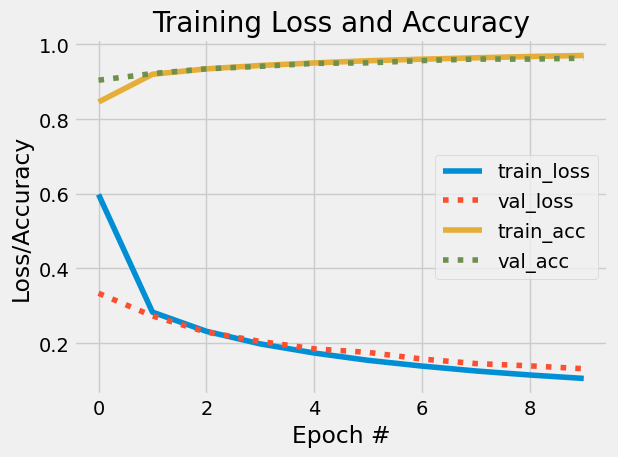

In [9]:
plt.style.use("fivethirtyeight")
plt.figure()
plt.plot(np.arange(0, 10), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 10), history.history["val_loss"], label="val_loss", linestyle=":")
plt.plot(np.arange(0, 10), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 10), history.history["val_accuracy"], label="val_acc", linestyle=":")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.tight_layout()
plt.legend()
plt.show()      # after 2 epochs acc is barely improving -> maybe overfitting

## Classifier metrics

We need to do a little bit of extra work to get the classification report to work properly.

In [10]:
# evaluate network
predictions = model.predict(X_test, batch_size=32)

438/438 [==============================] - 1s 2ms/step


In [12]:
# this is just to demonstrate what is going on in the next code block
predictions[0].argmax() # "of these 10 values in first prediction, which position is the highest number"

3

In [13]:
print(classification_report(y_test.argmax(axis=1), 
                            predictions.argmax(axis=1), 
                            target_names=[str(x) for x in lb.classes_]))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1376
           1       0.97      0.98      0.98      1630
           2       0.96      0.96      0.96      1444
           3       0.97      0.94      0.96      1458
           4       0.97      0.96      0.96      1353
           5       0.97      0.95      0.96      1243
           6       0.97      0.98      0.98      1354
           7       0.97      0.96      0.97      1438
           8       0.95      0.95      0.95      1322
           9       0.93      0.97      0.95      1382

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000



### Task

1. Turn the above into a ```.py``` script which can be run from the command line. Use argparse if you think it's relevant!
2. Use this notebook as a template to train a neural network on the ```Cifar-10``` dataset instead of ```MNIST```.
3. Turn *that* notebook into a ```.py``` script, too